Загружаю ресурс 'stopwords'...
Загружаю ресурс 'wordnet'...
Загружаю ресурс 'omw-1.4'...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


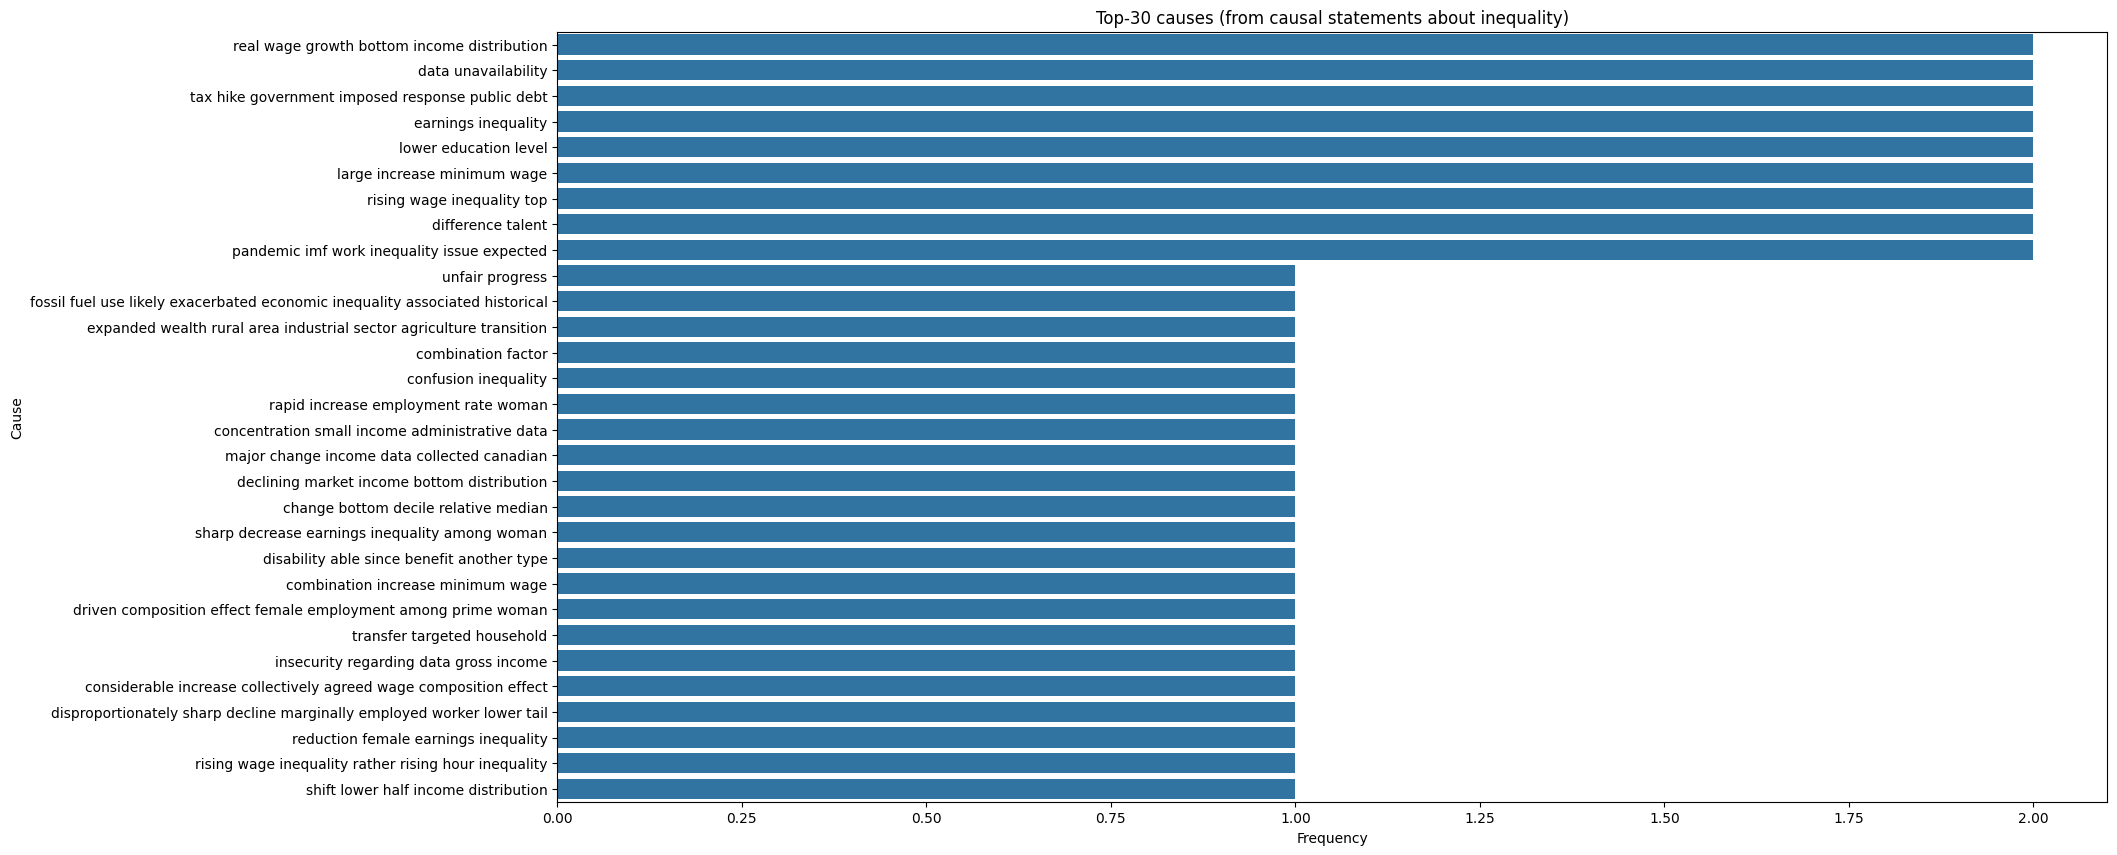

  2  real wage growth bottom income distribution
     e.g. this development was mainly driven by real wage growth at the bottom of the income distribution.

  2  data unavailability
     e.g. since the mid-2000s, however, female inequality has started to decrease much faster than male, standing 3 points below male inequality by 2019.

figure 19. gini coefficient of gross individual earnings, overall and by sex, over time












4 other countries have produced gini coefficient figures of gross individual earnings and total employer cost, but that was not possible in this case due to data unavailability.

  2  tax hike government imposed response public debt
     e.g. direct taxes as a share of gross income have remained relatively steady across the income distribution, increasing between 2011 and 2014 as a result of tax hikes that the government imposed in response to the public debt crisis (figure 28).

  2  earnings inequality
     e.g. trends in household income inequality are d

In [15]:
# input:Corpus.txt
# output: top_causes.csv

!pip install matplotlib seaborn

import nltk

required_resources = ['punkt', 'stopwords', 'wordnet', 'omw-1.4']
for resource in required_resources:
    try:
        nltk.data.find(f'tokenizers/{resource}' if resource == 'punkt' else resource)
    except LookupError:
        print(f"Загружаю ресурс '{resource}'...")
        nltk.download(resource)

import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
import pandas as pd
import re

with open('Corpus.txt', mode='r', encoding='utf-8') as f:
    text = f.read()

text = text.lower()

try:
    sentences = sent_tokenize(text)
except Exception as e:
    print(f"Tokenization error: {e}")
    raise

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
custom_stopwords = {'figure'}
stop_words.update(custom_stopwords)

ineq_keywords = {
    "inequality", "inequity", "disparity", "gap",
    "poverty", "deprivation", "income", "wealth",
    "redistribution", "mobility", "segregation"
}

cause_patterns = [
    r"\bbecause of\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\bdue to\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\bas a result of\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\bresult(?:s)? of\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\bdriven by\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\bcaused by\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\battributed to\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\bstemming from\s+([^.;:,\n\(\)\[\]]{5,200})",
    r"\barising from\s+([^.;:,\n\(\)\[\]]{5,200})",
]

def normalize_cause_fragment(fragment: str) -> str:
    fragment = " ".join(fragment.strip().split()[:12])

    toks = word_tokenize(fragment)
    clean = [
        lemmatizer.lemmatize(t.lower())
        for t in toks
        if t.isalpha() and len(t) > 2 and t.lower() not in stop_words
    ]
    if len(clean) < 2:
        return ""
    return " ".join(clean)

cause_phrases = []
cause_examples = {}

for s in sentences:
    s_low = s.lower()
    if not any(k in s_low for k in ineq_keywords):
        continue

    for rx in cause_patterns:
        m = re.search(rx, s_low)
        if not m:
            continue

        frag = m.group(1)
        frag = re.split(r"\b(and|but|while|whereas|which)\b", frag, maxsplit=1)[0]
        norm = normalize_cause_fragment(frag)

        if norm:
            cause_phrases.append(norm)
            if norm not in cause_examples:
                cause_examples[norm] = s.strip()

if cause_phrases:
    cause_fdist = FreqDist(cause_phrases)
    top_causes = cause_fdist.most_common(30)

    causes, counts = zip(*top_causes)

    plt.figure(figsize=(20, 10))
    sns.barplot(x=list(counts), y=list(causes), orient='h')
    plt.title("Top-30 causes (from causal statements about inequality)")
    plt.xlabel("Frequency")
    plt.ylabel("Cause")
    plt.show()

    for c, n in top_causes[:15]:
        print(f"{n:3d}  {c}\n     e.g. {cause_examples.get(c, '')}\n")
else:
    print("No causal reasons found with current patterns.")

df_causes = pd.DataFrame([
    {"cause": c, "count": n, "example": cause_examples.get(c, "")}
    for c, n in top_causes
])
df_causes.to_csv("top_causes.csv", index=False)
print("Saved: top_causes.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')